In [4]:
# Load Libreries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import pyplot
from scipy.stats import norm
import datetime as dt

In [5]:
# Import data
Loans_df = pd.read_csv("Loan_Data.csv")

In [6]:
Loans_df.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


In [7]:
Loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10000 non-null  int64  
 1   credit_lines_outstanding  10000 non-null  int64  
 2   loan_amt_outstanding      10000 non-null  float64
 3   total_debt_outstanding    10000 non-null  float64
 4   income                    10000 non-null  float64
 5   years_employed            10000 non-null  int64  
 6   fico_score                10000 non-null  int64  
 7   default                   10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


In [8]:
Loans_df.describe()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.974577e+06,1.461200,4159.677034,8718.916797,70039.901401,4.552800,637.557700,0.185100
std,2.293890e+06,1.743846,1421.399078,6627.164762,20072.214143,1.566862,60.657906,0.388398
min,1.000324e+06,0.000000,46.783973,31.652732,1000.000000,0.000000,408.000000,0.000000
25%,2.977661e+06,0.000000,3154.235371,4199.836020,56539.867903,3.000000,597.000000,0.000000
50%,4.989502e+06,1.000000,4052.377228,6732.407217,70085.826330,5.000000,638.000000,0.000000
75%,6.967210e+06,2.000000,5052.898103,11272.263740,83429.166133,6.000000,679.000000,0.000000
max,8.999789e+06,5.000000,10750.677810,43688.784100,148412.180500,10.000000,850.000000,1.000000


In [9]:
Loans_df.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


In [10]:
Loans_df['default'].value_counts()

,count
default,
0,8149
1,1851


#Exploratory Data Analysis
Using quick visualisations, we can explore the relationship between different variables in the dataset.

Let's start with a dual histogram of the FICO score of the borrowers, depending on the deafault (i.e. if a borrower defaults).

Text(0.5, 0, 'FICO')

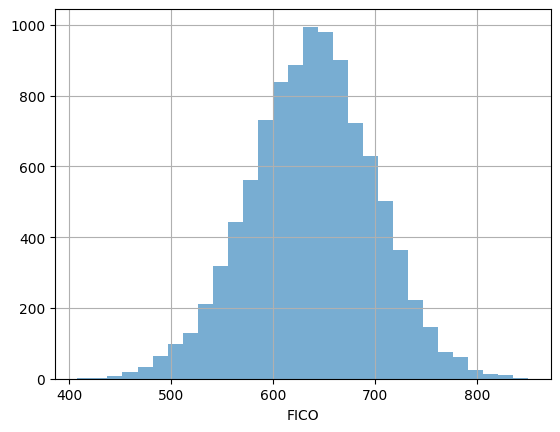

In [11]:
Loans_df['fico_score'].hist(bins=30,alpha=0.6,label='default=1')
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

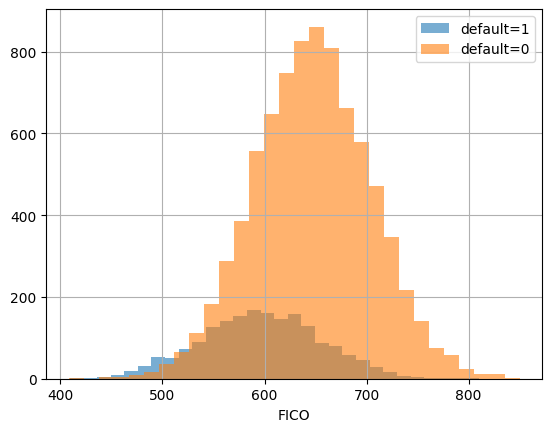

In [12]:
Loans_df[Loans_df['default']==1]['fico_score'].hist(bins=30,alpha=0.6,label='default=1')
Loans_df[Loans_df['default']==0]['fico_score'].hist(bins=30,alpha=0.6,label='default=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'income')

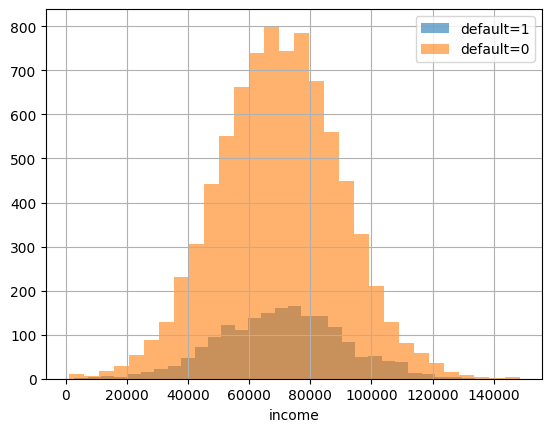

In [13]:
Loans_df[Loans_df['default']==1]['income'].hist(bins=30,alpha=0.6,label='default=1')
Loans_df[Loans_df['default']==0]['income'].hist(bins=30,alpha=0.6,label='default=0')
plt.legend()
plt.xlabel('income')

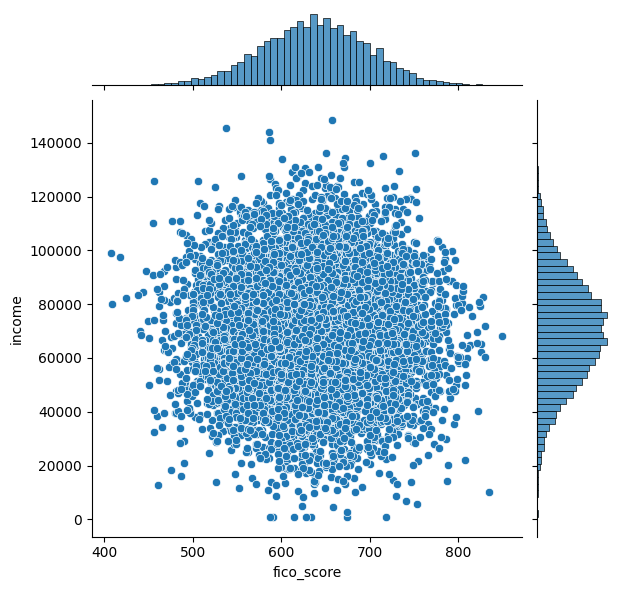

In [14]:
sns.jointplot(x='fico_score',y='income',data=Loans_df)

Text(0.5, 0, 'loan_amt_outstanding')

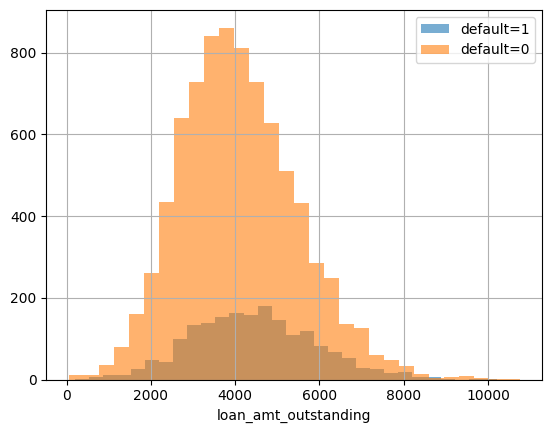

In [15]:
Loans_df[Loans_df['default']==1]['loan_amt_outstanding'].hist(bins=30,alpha=0.6,label='default=1')
Loans_df[Loans_df['default']==0]['loan_amt_outstanding'].hist(bins=30,alpha=0.6,label='default=0')
plt.legend()
plt.xlabel('loan_amt_outstanding')

Text(0.5, 0, 'income')

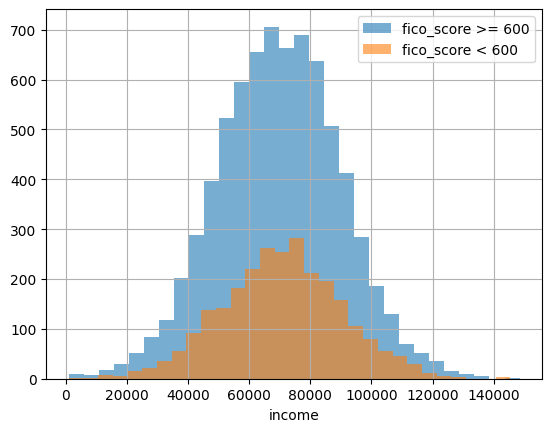

In [16]:
Loans_df[Loans_df['fico_score']>=600]['income'].hist(bins=30,alpha=0.6,label='fico_score >= 600')
Loans_df[Loans_df['fico_score']<600]['income'].hist(bins=30,alpha=0.6,label='fico_score < 600')
plt.legend()
plt.xlabel('income')

Text(0.5, 0, 'loan_amt_outstanding')

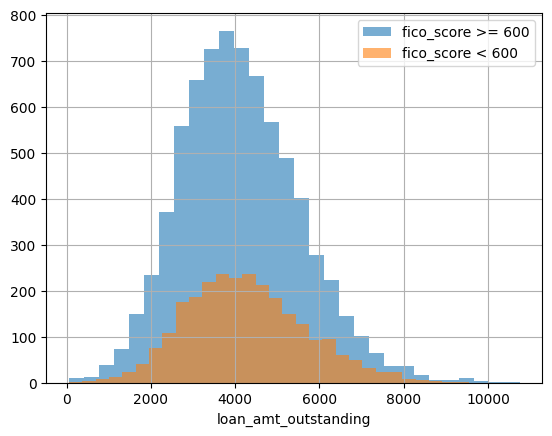

In [17]:
Loans_df[Loans_df['fico_score']>=600]['loan_amt_outstanding'].hist(bins=30,alpha=0.6,label='fico_score >= 600')
Loans_df[Loans_df['fico_score']<600]['loan_amt_outstanding'].hist(bins=30,alpha=0.6,label='fico_score < 600')
plt.legend()
plt.xlabel('loan_amt_outstanding')

/tmp/ipython-input-18-3542933036.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  q.set_xticklabels(q.get_xticklabels(),rotation=30)


Text(0.5, 1.0, 'Total Employee Length')

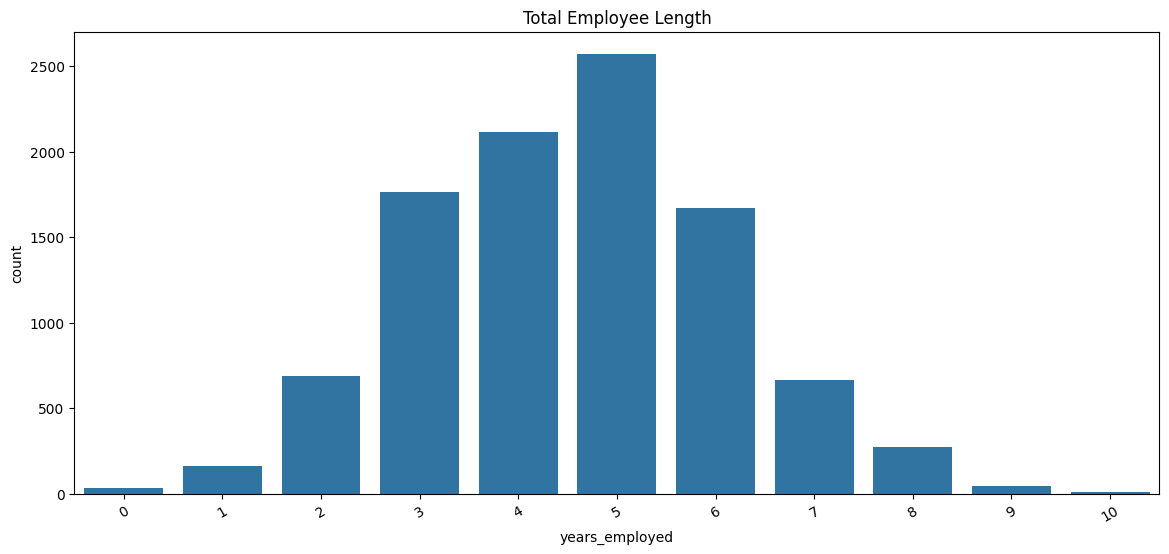

In [18]:
#emp_length variable
df = Loans_df.groupby('years_employed')['years_employed'].count().reset_index(name='count').sort_values('years_employed',ascending=True)
fig, ax = plt.subplots()
fig.set_size_inches(14,6)
q = sns.barplot(x="years_employed", y="count", data=df)
q.set_xticklabels(q.get_xticklabels(),rotation=30)
plt.title('Total Employee Length')

/tmp/ipython-input-19-3631637197.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  q.set_xticklabels(q.get_xticklabels(),rotation=30)


Text(0.5, 1.0, 'credit lines outstanding ')

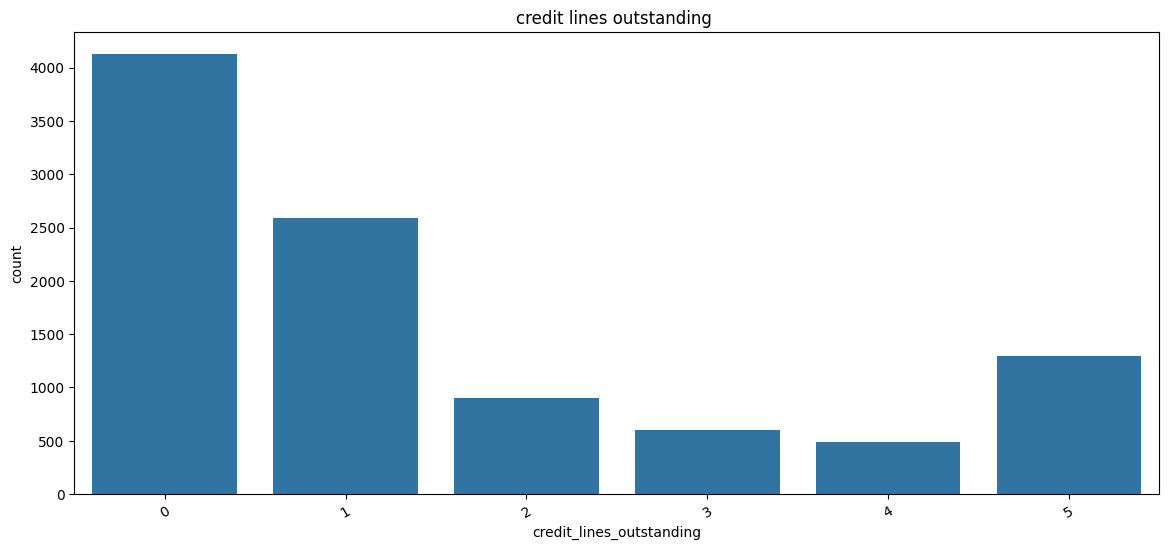

In [19]:
#credit_lines_outstanding variable
df = Loans_df.groupby('credit_lines_outstanding')['credit_lines_outstanding'].count().reset_index(name='count').sort_values('credit_lines_outstanding',ascending=True)
fig, ax = plt.subplots()
fig.set_size_inches(14,6)
q = sns.barplot(x="credit_lines_outstanding", y="count", data=df)
q.set_xticklabels(q.get_xticklabels(),rotation=30)
plt.title('credit lines outstanding ')

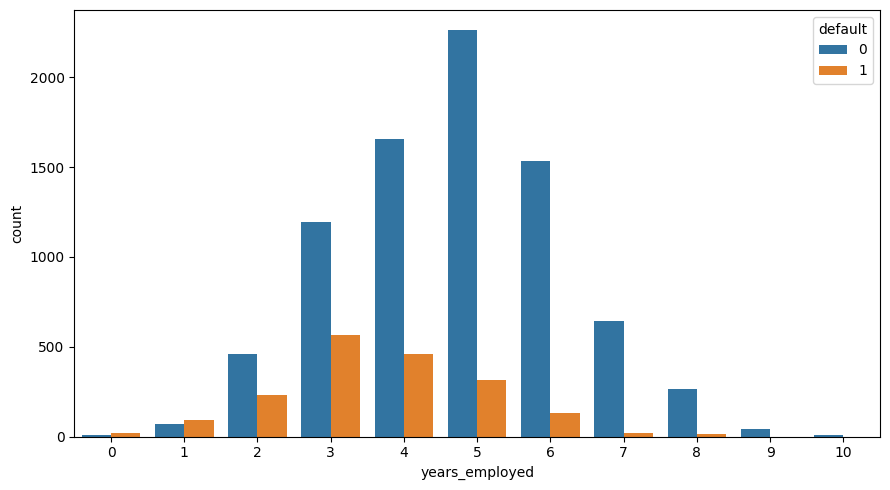

In [20]:
plt.figure(figsize=(9,5))
sns.countplot(x=Loans_df['years_employed'],hue=Loans_df['default'])
plt.tight_layout()

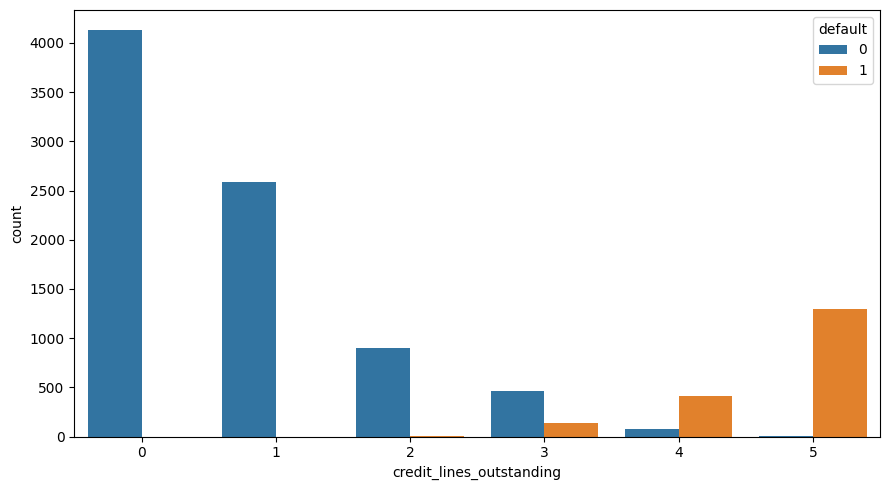

In [21]:
plt.figure(figsize=(9,5))
sns.countplot(x=Loans_df['credit_lines_outstanding'],hue=Loans_df['default'])
plt.tight_layout()

In [22]:
Loans_df.groupby('credit_lines_outstanding')['default'].count().reset_index(name='count').sort_values('credit_lines_outstanding',ascending=True)

,credit_lines_outstanding,count
0,0,4128
1,1,2590
2,2,902
3,3,599
4,4,484
5,5,1297


In [23]:
Loans_df['ratio_income_Totdebt'] = Loans_df['income']/Loans_df['total_debt_outstanding']
Loans_df['ratio_income_loan_amt'] = Loans_df['income']/Loans_df['loan_amt_outstanding']

In [24]:
Loans_df

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default,ratio_income_Totdebt,ratio_income_loan_amt
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0,19.931033,14.945650
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1,3.238454,13.603576
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0,32.481364,19.585647
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0,29.722181,15.599407
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0,13.256433,17.422978
...,...,...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0,16.717341,14.072707
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0,14.651358,19.287238
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0,7.935166,12.367199
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0,48.825030,15.485222


Text(0.5, 0, 'ratio_income_Totdebt')

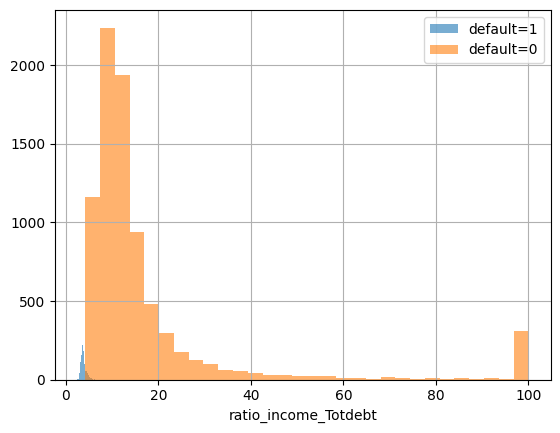

In [25]:
Loans_df[Loans_df['default']==1]['ratio_income_Totdebt'].hist(bins=30,alpha=0.6,label='default=1')
Loans_df[Loans_df['default']==0]['ratio_income_Totdebt'].hist(bins=30,alpha=0.6,label='default=0')
plt.legend()
plt.xlabel('ratio_income_Totdebt')

Text(0.5, 0, 'ratio_income_loan_amt')

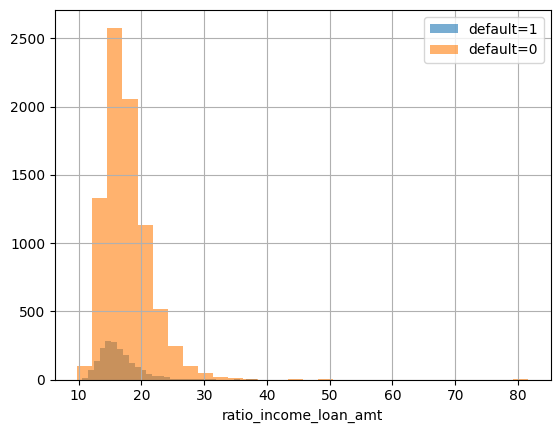

In [26]:
Loans_df[Loans_df['default']==1]['ratio_income_loan_amt'].hist(bins=30,alpha=0.6,label='default=1')
Loans_df[Loans_df['default']==0]['ratio_income_loan_amt'].hist(bins=30,alpha=0.6,label='default=0')
plt.legend()
plt.xlabel('ratio_income_loan_amt')

Text(0.5, 0, 'ratio_income_Totdebt')

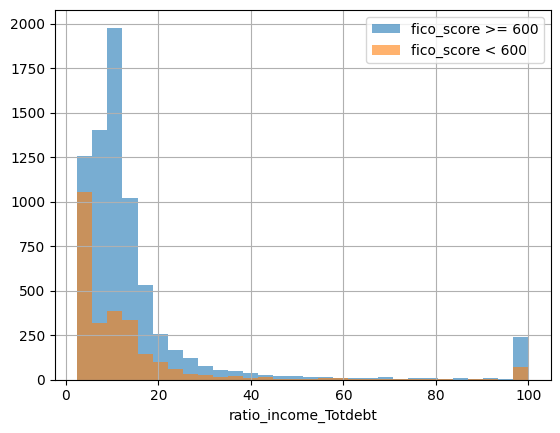

In [27]:
Loans_df[Loans_df['fico_score']>=600]['ratio_income_Totdebt'].hist(bins=30,alpha=0.6,label='fico_score >= 600')
Loans_df[Loans_df['fico_score']<600]['ratio_income_Totdebt'].hist(bins=30,alpha=0.6,label='fico_score < 600')
plt.legend()
plt.xlabel('ratio_income_Totdebt')

Text(0.5, 0, 'ratio_income_loan_amt')

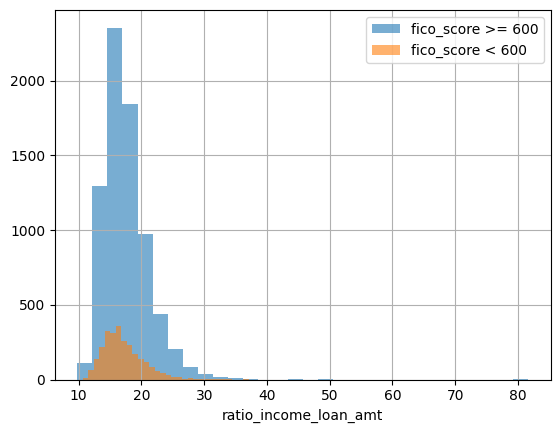

In [28]:
Loans_df[Loans_df['fico_score']>=600]['ratio_income_loan_amt'].hist(bins=30,alpha=0.6,label='fico_score >= 600')
Loans_df[Loans_df['fico_score']<600]['ratio_income_loan_amt'].hist(bins=30,alpha=0.6,label='fico_score < 600')
plt.legend()
plt.xlabel('ratio_income_loan_amt')

/tmp/ipython-input-29-529138506.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  q.set_xticklabels(q.get_xticklabels(),rotation=30)


Text(0.5, 1.0, 'credit_lines_outstanding to mean total debt')

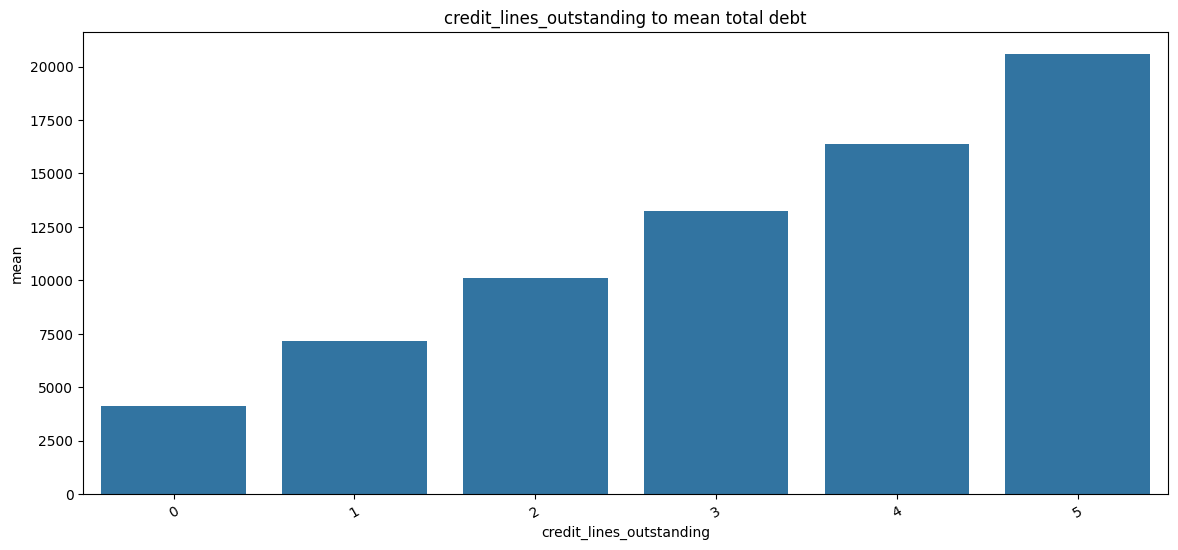

In [29]:
df=Loans_df.groupby(['credit_lines_outstanding'])['total_debt_outstanding'].mean().reset_index(name='mean').sort_values('credit_lines_outstanding',ascending=True)
fig, ax = plt.subplots()
fig.set_size_inches(14,6)
q = sns.barplot(x="credit_lines_outstanding", y="mean", data=df)
q.set_xticklabels(q.get_xticklabels(),rotation=30)
plt.title('credit_lines_outstanding to mean total debt')

/tmp/ipython-input-30-2932186489.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  q.set_xticklabels(q.get_xticklabels(),rotation=30)


Text(0.5, 1.0, 'credit_lines_outstanding to mean ratio income/Total debt')

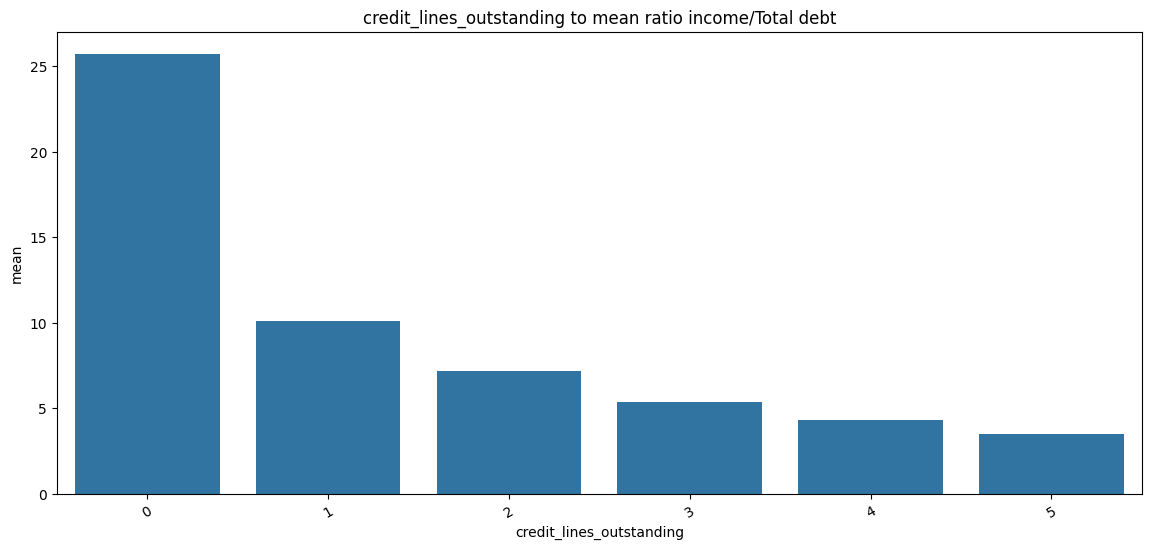

In [30]:
df=Loans_df.groupby(['credit_lines_outstanding'])['ratio_income_Totdebt'].mean().reset_index(name='mean').sort_values('credit_lines_outstanding',ascending=True)
fig, ax = plt.subplots()
fig.set_size_inches(14,6)
q = sns.barplot(x="credit_lines_outstanding", y="mean", data=df)
q.set_xticklabels(q.get_xticklabels(),rotation=30)
plt.title('credit_lines_outstanding to mean ratio income/Total debt')

/tmp/ipython-input-31-1055342800.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  q.set_xticklabels(q.get_xticklabels(),rotation=30)


Text(0.5, 1.0, 'credit_lines_outstanding to mean ratio income/loan amount')

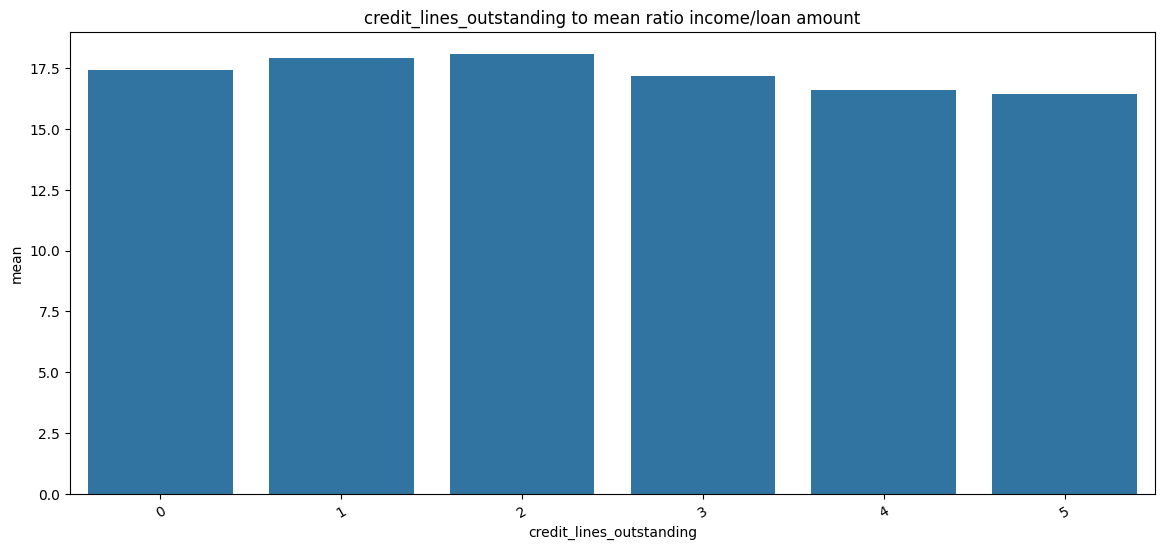

In [31]:
df=Loans_df.groupby(['credit_lines_outstanding'])['ratio_income_loan_amt'].mean().reset_index(name='mean').sort_values('credit_lines_outstanding',ascending=True)
fig, ax = plt.subplots()
fig.set_size_inches(14,6)
q = sns.barplot(x="credit_lines_outstanding", y="mean", data=df)
q.set_xticklabels(q.get_xticklabels(),rotation=30)
plt.title('credit_lines_outstanding to mean ratio income/loan amount')

/tmp/ipython-input-32-436998039.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  q.set_xticklabels(q.get_xticklabels(),rotation=30)


Text(0.5, 1.0, 'credit_lines_outstanding to mean fico score')

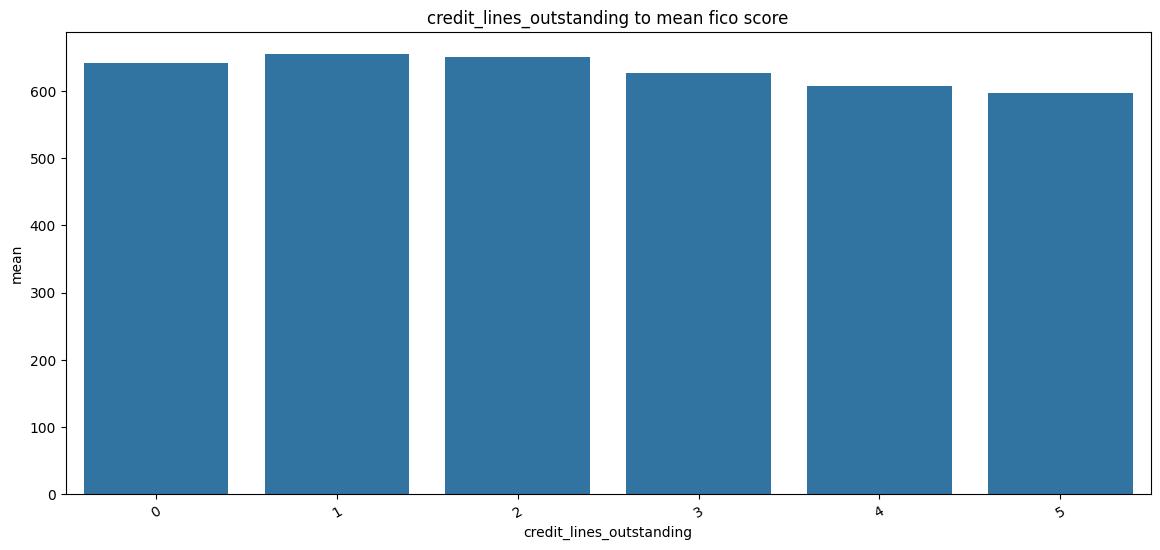

In [32]:
df=Loans_df.groupby(['credit_lines_outstanding'])['fico_score'].mean().reset_index(name='mean').sort_values('credit_lines_outstanding',ascending=True)
fig, ax = plt.subplots()
fig.set_size_inches(14,6)
q = sns.barplot(x="credit_lines_outstanding", y="mean", data=df)
q.set_xticklabels(q.get_xticklabels(),rotation=30)
plt.title('credit_lines_outstanding to mean fico score')

#Correlation in Credit Features

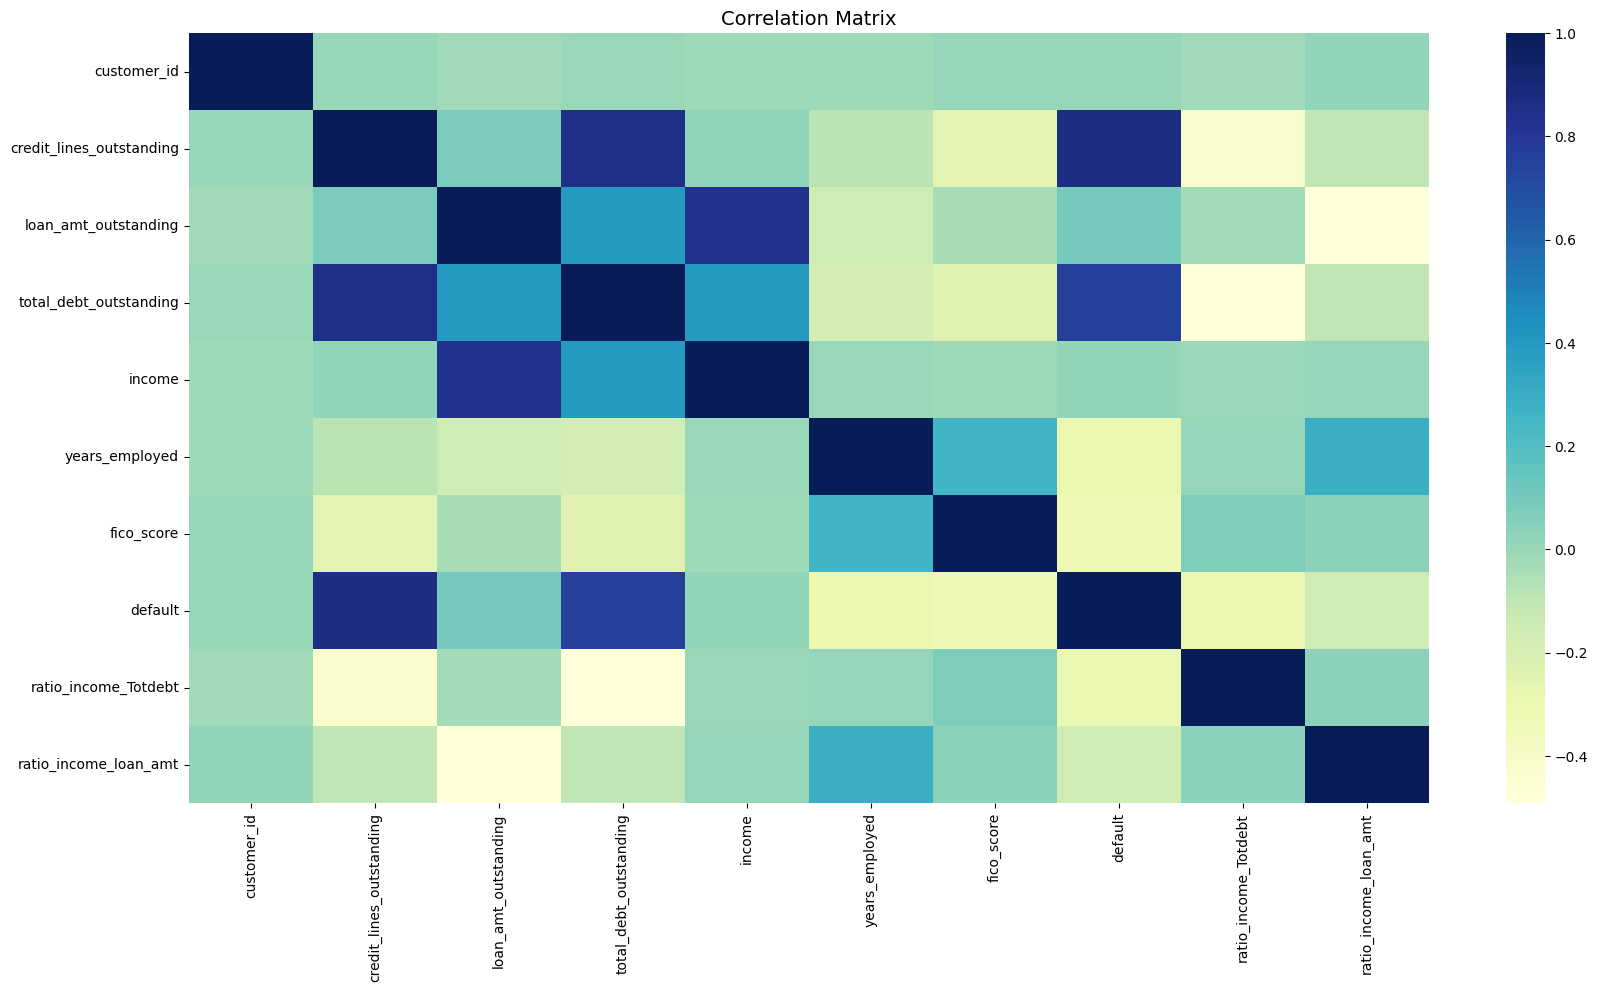

In [33]:
# Sample figsize in inches
fig, ax = plt.subplots(figsize=(20,10))

# Imbalanced DataFrame Correlation
corr = Loans_df.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Correlation Matrix", fontsize=14)
plt.show()

#Create predictions of probability for loan status using test data

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, roc_auc_score

In [35]:
X = Loans_df.drop(['default'], axis=1)

In [36]:
Y = Loans_df['default']

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.6, random_state=123)

In [38]:
# Create, train, and fit a logistic regression model
from sklearn.linear_model import LogisticRegression
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(Y_train))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
# Create predictions of probability for loan status using test data
# .predict_proba creates an array of probabilities of default: [[non-defualt-0, default-1]]
lr_preds = clf_logistic.predict_proba(X_test)

In [40]:
# # Create dataframes of predictions and true labels
lr_preds_df = pd.DataFrame(lr_preds[:,1][0:], columns = ['lr_pred_PD'])
true_df = Y_test

In [41]:
# Concatenate and print the two data frames for comparison
print(pd.concat([true_df.reset_index(drop = True), lr_preds_df], axis = 1))

      default    lr_pred_PD
0           0  2.014755e-01
1           0  3.479998e-03
2           0  9.583379e-06
3           0  6.405633e-04
4           0  1.057630e-02
...       ...           ...
5995        0  8.384741e-07
5996        0  1.870434e-05
5997        0  1.698415e-02
5998        0  8.718597e-07
5999        0  7.708172e-01

[6000 rows x 2 columns]


In [42]:
import math

In [43]:
lr_preds_df.round(decimals=2).value_counts()

,count
lr_pred_PD,
0.00,4428
1.00,714
0.01,137
0.99,83
0.02,50
...,...
0.39,2
0.76,2
0.46,1


In [44]:
Y_test.value_counts()

,count
default,
0,4932
1,1068


In [45]:
# Reassign loan status based on the threshold and print the predictions
lr_preds_df['lr_pred_loan_status_60'] = lr_preds_df['lr_pred_PD'].apply(lambda x: 1 if x > 0.60 else 0)
print("Non-Default / Default predictions at 60% Threshhold: ")
print(lr_preds_df['lr_pred_loan_status_60'].value_counts())

Non-Default / Default predictions at 60% Threshhold: 
lr_pred_loan_status_60
0    4968
1    1032
Name: count, dtype: int64


In [46]:
# Print the confusion matrix
from sklearn.metrics import confusion_matrix
print("Confusion Matrix at 60% Threshhold: ")
print(confusion_matrix(Y_test, lr_preds_df['lr_pred_loan_status_60']))

Confusion Matrix at 60% Threshhold: 
[[4899   33]
 [  69  999]]


In [47]:
# Print the classification report
from sklearn.metrics import classification_report
target_names = ['Non-Default', 'Default']
print(classification_report(Y_test, lr_preds_df['lr_pred_loan_status_60'], target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.99      0.99      0.99      4932
     Default       0.97      0.94      0.95      1068

    accuracy                           0.98      6000
   macro avg       0.98      0.96      0.97      6000
weighted avg       0.98      0.98      0.98      6000



In [48]:
# Print the accuracy score the model
print(clf_logistic.score(X_test, Y_test))

0.9828333333333333


In [49]:
# Plot the ROC curve of the probabilities of default
from sklearn.metrics import roc_curve

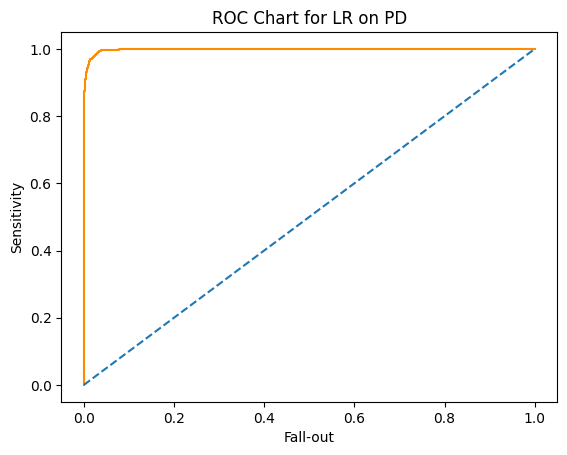

In [50]:
lr_prob_default = lr_preds[:, 1]
fallout, sensitivity, thresholds = roc_curve(Y_test, lr_prob_default)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Chart for LR on PD")
plt.xlabel("Fall-out")
plt.ylabel("Sensitivity")
plt.show()

In [51]:
lr_preds_df.round(decimals=2)

,lr_pred_PD,lr_pred_loan_status_60
0,0.20,0
1,0.00,0
2,0.00,0
3,0.00,0
4,0.01,0
...,...,...
5995,0.00,0
5996,0.00,0
5997,0.02,0
5998,0.00,0


In [52]:
Loans_df.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default,ratio_income_Totdebt,ratio_income_loan_amt
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0,19.931033,14.945650
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1,3.238454,13.603576
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0,32.481364,19.585647
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0,29.722181,15.599407
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0,13.256433,17.422978


In [53]:
Loans_df.drop(['default'], axis=1,inplace=True)

In [54]:
Loans_df

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,ratio_income_Totdebt,ratio_income_loan_amt
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,19.931033,14.945650
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,3.238454,13.603576
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,32.481364,19.585647
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,29.722181,15.599407
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,13.256433,17.422978
...,...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,16.717341,14.072707
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,14.651358,19.287238
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,7.935166,12.367199
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,48.825030,15.485222


In [55]:
Prob_to_default = clf_logistic.predict_proba(Loans_df)

In [56]:
prob_data = pd.DataFrame(Prob_to_default[:,1][0:].round(decimals = 2), columns = ['Probability _to_Default'])

In [57]:
Loans_df=pd.concat([Loans_df, prob_data], axis = 1)

In [58]:
Loans_df

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,ratio_income_Totdebt,ratio_income_loan_amt,Probability _to_Default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,19.931033,14.945650,0.00
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,3.238454,13.603576,0.99
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,32.481364,19.585647,0.00
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,29.722181,15.599407,0.00
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,13.256433,17.422978,0.00
...,...,...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,16.717341,14.072707,0.00
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,14.651358,19.287238,0.00
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,7.935166,12.367199,0.01
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,48.825030,15.485222,0.00


In [59]:
# Recovery rate
recovery_rate = 0.1

In [60]:
# Loss Given Default (LGD)
Loans_df['lgd'] = (1 - recovery_rate) * Loans_df['loan_amt_outstanding']

In [61]:
Loans_df['expected_loss'] = Loans_df['Probability _to_Default'] * Loans_df['lgd']

In [62]:
Loans_df.tail()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,ratio_income_Totdebt,ratio_income_loan_amt,Probability _to_Default,lgd,expected_loss
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,16.717341,14.072707,0.00,2730.282393,0.000000
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,14.651358,19.287238,0.00,3731.615374,0.000000
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,7.935166,12.367199,0.01,2779.401354,27.794014
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,48.825030,15.485222,0.00,2960.011499,0.000000
9999,5533570,1,1917.652480,3050.248203,30611.62821,6,757,10.035783,15.963074,0.00,1725.887232,0.000000


In [63]:
Loans_df.sort_values('expected_loss',ascending=False)

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,ratio_income_Totdebt,ratio_income_loan_amt,Probability _to_Default,lgd,expected_loss
1997,6597386,5,10210.746690,33515.971170,107870.38960,2,649,3.218477,10.564398,1.0,9189.672021,9189.672021
2138,1998635,5,9563.693515,28825.601850,112120.62640,3,641,3.889620,11.723570,1.0,8607.324164,8607.324164
9203,4836461,5,9105.964213,42558.451490,133913.38230,3,601,3.146576,14.706118,1.0,8195.367792,8195.367792
9944,3983392,4,8989.178801,30103.662560,124197.63370,2,641,4.125665,13.816349,1.0,8090.260921,8090.260921
5460,2527305,5,8841.923630,32644.921580,115203.15190,2,541,3.528976,13.029196,1.0,7957.731267,7957.731267
...,...,...,...,...,...,...,...,...,...,...,...,...
3833,4933639,1,7558.672642,10258.540130,121860.13150,5,656,11.878896,16.121896,0.0,6802.805378,0.000000
3834,7720314,0,4582.977170,1500.083335,66409.87028,2,590,44.270787,14.490552,0.0,4124.679453,0.000000
3835,6561948,0,3476.856695,4258.810352,62734.09732,5,523,14.730428,18.043337,0.0,3129.171025,0.000000
3836,7131504,0,3452.535598,3620.915701,67068.24401,6,724,18.522454,19.425794,0.0,3107.282038,0.000000


#Creating, Training, and Fitting a XGBoost Model to Oversampled Data

In [64]:
import xgboost as xgb

In [65]:
# Import data
Loans_df = pd.read_csv("Loan_Data.csv")

In [66]:
X = Loans_df.drop(['default'], axis=1)

In [67]:
Y = Loans_df['default']

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=123)

In [69]:
model = xgb.XGBClassifier()
clf_xgbt = model.fit(X_train, np.ravel(Y_train))

In [70]:
# Create predictions of probability for loan status using test data
# .predict_proba creates an array of probabilities of default: [[non-defualt-0, default-1]]
xgbt_preds = clf_xgbt.predict_proba(X_test)

In [71]:
# Create dataframes of predictions and labels
xgbt_preds_df = pd.DataFrame(xgbt_preds[:,1][0:], columns = ['xgbt_pred_PD'])
true_df = Y_test

In [72]:
# Concatenate and print the two data frames for comparison
print(pd.concat([true_df.reset_index(drop = True), xgbt_preds_df], axis = 1))

      default  xgbt_pred_PD
0           0      0.029665
1           0      0.000056
2           0      0.000002
3           0      0.000012
4           0      0.000077
...       ...           ...
2995        0      0.000043
2996        1      0.999410
2997        0      0.000028
2998        0      0.000003
2999        1      0.999972

[3000 rows x 2 columns]


In [73]:
# Reassign loan status based on the threshold and print the predictions
xgbt_preds_df['xgbt_pred_loan_status_60'] = xgbt_preds_df['xgbt_pred_PD'].apply(lambda x: 1 if x > 0.60 else 0)
print("Non-Default / Default  predictions at 60% Threshhold: ")
print(xgbt_preds_df['xgbt_pred_loan_status_60'].value_counts())

# Print the confusion matrix
print("Confusion Matrix at 60% Threshhold: ")
print(confusion_matrix(Y_test, xgbt_preds_df['xgbt_pred_loan_status_60']))

# Print the classification report
target_names = ['Non-Default', 'Default']
print(classification_report(Y_test, xgbt_preds_df['xgbt_pred_loan_status_60'], target_names=target_names))

Non-Default / Default  predictions at 60% Threshhold: 
xgbt_pred_loan_status_60
0    2475
1     525
Name: count, dtype: int64
Confusion Matrix at 60% Threshhold: 
[[2466    6]
 [   9  519]]
              precision    recall  f1-score   support

 Non-Default       1.00      1.00      1.00      2472
     Default       0.99      0.98      0.99       528

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



0.995


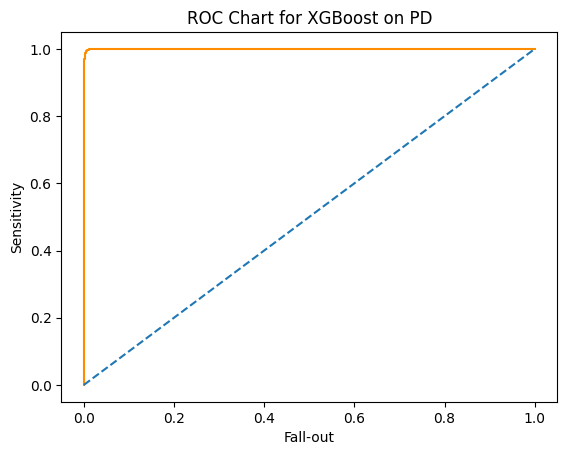

In [74]:
# Print the accuracy score the model
print(clf_xgbt.score(X_test, Y_test))

# Plot the ROC curve of the probabilities of default
from sklearn.metrics import roc_curve

xgb_prob_default = xgbt_preds[:, 1]
fallout, sensitivity, thresholds = roc_curve(Y_test, xgb_prob_default)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Chart for XGBoost on PD")
plt.xlabel("Fall-out")
plt.ylabel("Sensitivity")
plt.show()

# Compute the AUC and store it in a variable
from sklearn.metrics import roc_auc_score

xgb_auc = roc_auc_score(Y_test, xgb_prob_default)

In [75]:
xgbt_preds_df

,xgbt_pred_PD,xgbt_pred_loan_status_60
0,0.029665,0
1,0.000056,0
2,0.000002,0
3,0.000012,0
4,0.000077,0
...,...,...
2995,0.000043,0
2996,0.999410,1
2997,0.000028,0
2998,0.000003,0


In [76]:
Loans_df['default'].value_counts()

,count
default,
0,8149
1,1851


In [77]:
Loans_df.drop(['default'], axis=1,inplace=True)

In [78]:
Prob_to_default = clf_xgbt.predict_proba(Loans_df)

In [79]:
prob_data = pd.DataFrame(Prob_to_default[:,1][0:].round(decimals = 2), columns = ['Probability _to_Default'])

In [80]:
prob_data['Probability _to_Default'].apply(lambda x: 1 if x > 0.60 else 0).value_counts()

,count
Probability _to_Default,
0,8152
1,1848


In [81]:
Loans_df=pd.concat([Loans_df, prob_data], axis = 1)

In [82]:
# Recovery rate
recovery_rate = 0.1

In [83]:
# Loss Given Default (LGD)
Loans_df['lgd'] = (1 - recovery_rate) * Loans_df['loan_amt_outstanding']

In [84]:
# Expected Loss

Loans_df['expected_loss'] = Loans_df['Probability _to_Default'] * Loans_df['lgd']

In [85]:
Loans_df.sort_values('expected_loss',ascending=False)

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,Probability _to_Default,lgd,expected_loss
1997,6597386,5,10210.746690,33515.971170,107870.38960,2,649,1.0,9189.672021,9189.672021
2138,1998635,5,9563.693515,28825.601850,112120.62640,3,641,1.0,8607.324164,8607.324164
9203,4836461,5,9105.964213,42558.451490,133913.38230,3,601,1.0,8195.367792,8195.367792
9944,3983392,4,8989.178801,30103.662560,124197.63370,2,641,1.0,8090.260921,8090.260921
5460,2527305,5,8841.923630,32644.921580,115203.15190,2,541,1.0,7957.731267,7957.731267
...,...,...,...,...,...,...,...,...,...,...
3696,2939003,0,4597.262662,5104.527120,75203.51286,5,716,0.0,4137.536396,0.000000
3697,8422382,0,5472.700711,6065.629709,76244.96636,3,627,0.0,4925.430640,0.000000
3698,7818331,0,5230.517514,2545.052670,70302.56998,6,739,0.0,4707.465763,0.000000
3699,5397639,0,1575.656558,1440.356678,27270.11818,3,697,0.0,1418.090902,0.000000
